In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=1.15, style='whitegrid')

### Historic NetConnect Germany imbalance prices in EUR per MWh

In [2]:
netconnect_data_raw = pd.read_xml('data/raw/NetConnect Germany imbalance prices.xml')
netconnect_data = netconnect_data_raw.loc[netconnect_data_raw['Gasday'].notna()].set_index('Gasday')[1:]
netconnect_data.index = pd.to_datetime(netconnect_data.index)
netconnect_data.index.name = 'Date'

Text(0.5, 0, 'Date')

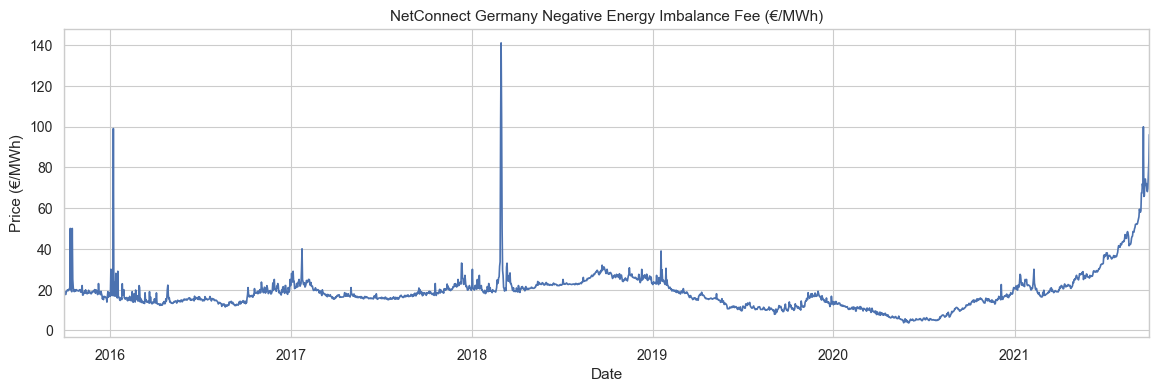

In [3]:
fig, ax = plt.subplots(figsize=(14, 4))
netconnect_data['NegativeEnergyImbalanceFee'].plot(ax=ax)

ax.set_title('NetConnect Germany Negative Energy Imbalance Fee (€/MWh)')
ax.set_ylabel('Price (€/MWh)')
ax.set_xlabel('Date')

### Historic GASPOOL imbalance prices

In [4]:
gaspool_data_raw = pd.read_csv(
    'data/raw/GASPOOL imbalance prices.csv',
    sep=';',
    index_col='Date')

gaspool_data = gaspool_data_raw[84:]
gaspool_data.index = pd.to_datetime(gaspool_data.index, format='%d.%m.%Y')

# Note that the column name is not correct, the price is actually in Euro/MWh
gaspool_data = gaspool_data['Price for pos. compensation energy [Eurocent/kWh]'].astype(float)

Text(0.5, 0, 'Date')

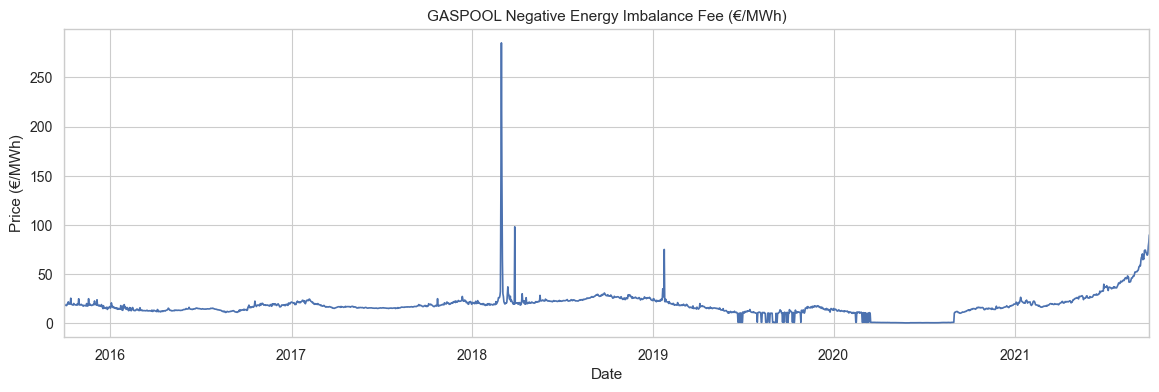

In [5]:
fig, ax = plt.subplots(figsize=(14, 4))
gaspool_data.plot(ax=ax)

ax.set_title('GASPOOL Negative Energy Imbalance Fee (€/MWh)')
ax.set_ylabel('Price (€/MWh)')
ax.set_xlabel('Date')

### Trading Hub Europe imbalance prices

In [14]:
the_data_raw = pd.read_csv(
    'data/raw/Trading Hub Europe imbalance prices.csv',
    sep=';',
    index_col='Gastag',
    decimal=','
)

the_data = the_data_raw
the_data.index.name = 'Date'
the_data.index = pd.to_datetime(the_data.index, format='%d.%m.%Y')

,Positiver Ausgleichsenergiepreis (EUR/MWh),Negativer Ausgleichsenergiepreis (EUR/MWh),Preis System Buy (EUR/MWh),Preis System Sell (EUR/MWh),VHP-Index (EUR/MWh),VHP-Index + 2 % (EUR/MWh),VHP-Index - 2 % (EUR/MWh)
Date,,,,,,,
2022-11-28,128.625,118.675,128.625,118.675,123.386,125.854,120.918
2022-11-27,123.765,117.250,NaN,117.250,121.338,123.765,118.911
2022-11-26,123.801,118.947,NaN,120.025,121.374,123.801,118.947
2022-11-25,124.658,112.400,123.400,112.400,122.214,124.658,119.770
2022-11-24,127.752,122.742,NaN,123.900,125.247,127.752,122.742
...,...,...,...,...,...,...,...
2021-10-05,106.000,85.000,106.000,85.000,93.379,95.247,91.511
2021-10-04,92.569,77.025,92.000,77.025,90.754,92.569,88.939
2021-10-03,90.135,63.675,NaN,63.675,88.368,90.135,86.601


Text(0.5, 0, 'Date')

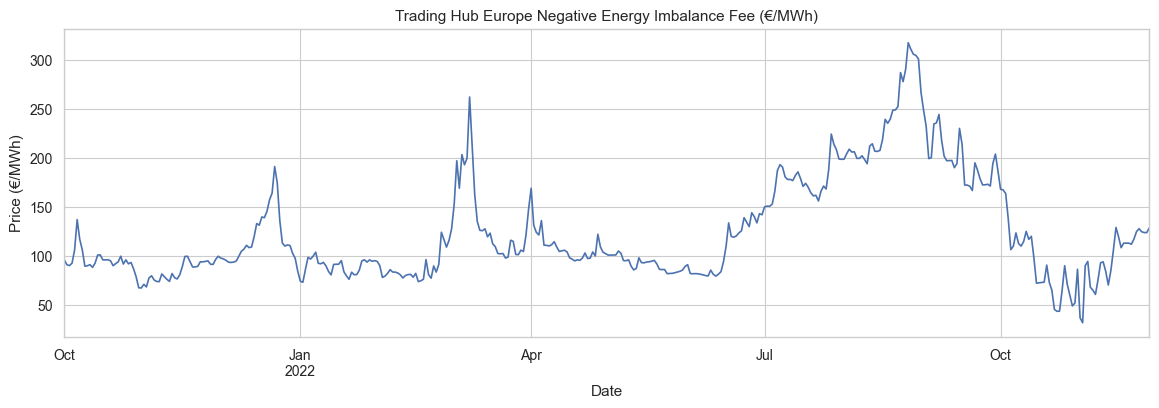

In [15]:
fig, ax = plt.subplots(figsize=(14, 4))
the_data['Positiver Ausgleichsenergiepreis (EUR/MWh)'].plot(ax=ax)

ax.set_title('Trading Hub Europe Negative Energy Imbalance Fee (€/MWh)')
ax.set_ylabel('Price (€/MWh)')
ax.set_xlabel('Date')